In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [14]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from scipy.stats import expon, anderson, probplot, sem, describe
import math

import matplotlib.pyplot as plt

from copy import deepcopy
from collections import defaultdict

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pickle

In [3]:
# r_n function
def r(n, D):
    return (n ** (-1/(2*D))) / 10
    # designed for n = 10^6

In [4]:
n = 1000000
D = 2

x_init = np.array([0.1, 0.1])
x_goal = np.array([0.9, 0.9])

In [5]:
filename = 'slurm scripts/data/07-06-20/path_points/'

In [6]:
points = []
distances = []
S_n = []
counts = []

T_n_indices = defaultdict(list)

for i in range(1,1001):
    #if distances[i] == float('inf'):
    #    S_n.append(float('inf'))
    #    continue
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    points.append(pathpoints)
    s_n = 0
    for j in range(len(pathpoints)-2):
        s_n += np.linalg.norm(pathpoints[j+1] - pathpoints[j])
    S_n.append(s_n)
    distances.append(s_n + np.linalg.norm(pathpoints[-1] - pathpoints[-2]))
    counts.append(len(pathpoints)-2)
    T_n_indices[len(pathpoints)-2].append(i)
    
    if pathpoints[-1][0] != 0.9 or pathpoints[-1][1] != 0.9:
        print(i)

        
distances = np.array(distances)
S_n = np.array(S_n)
counts = np.array(counts)

In [7]:
edge_lengths = []
angle_displacements = []
for i in range(1, 501):
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
        
        #if j == len(pathpoints)-3:
        #    continue
        
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angle_displacements.append(angle)
        
edge_lengths = np.array(edge_lengths)
angle_displacements = np.array(angle_displacements)

In [8]:
# for a given path (simulation), look at the distribution of angle displacements (signed)

angles_by_path = defaultdict(list)

for i in range(1, 1001):
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        #edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
                #if j == len(pathpoints)-3:
        #    continue
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angles_by_path[i].append(angle)

In [9]:
def show_hist_1(path_idx):
    #path_idx = 1

    plt.figure(figsize=(20, 6))
    plt.hist(angles_by_path[path_idx], bins=50)
    plt.title('Number of data points: '+str(len(angles_by_path[path_idx])))
    plt.show()
    
    print('mean: ' + str(np.mean(angles_by_path[path_idx])))
    print('median: ' + str(np.median(angles_by_path[path_idx])))
    print('std: ' + str(np.std(angles_by_path[path_idx])))

In [10]:
interact(show_hist_1, path_idx=widgets.IntSlider(min=1, max=1000, step=1, value=1))

interactive(children=(IntSlider(value=1, description='path_idx', max=1000, min=1), Output()), _dom_classes=('w…

<function __main__.show_hist_1(path_idx)>

In [12]:
# for a given path (simulation), look at the distribution of edge lengths 

edges_by_path = defaultdict(list)

for i in range(1, 1001):
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edges_by_path[i].append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))

In [19]:
def show_hist_2(path_idx):
    #path_idx = 1

    plt.figure(figsize=(20, 6))
    plt.hist(edges_by_path[path_idx], bins=75)
    plt.title('Number of data points: '+str(len(edges_by_path[path_idx])))
    plt.show()

In [20]:
interact(show_hist_2, path_idx=widgets.IntSlider(min=1, max=1000, step=1, value=1))

interactive(children=(IntSlider(value=1, description='path_idx', max=1000, min=1), Output()), _dom_classes=('w…

<function __main__.show_hist_2(path_idx)>

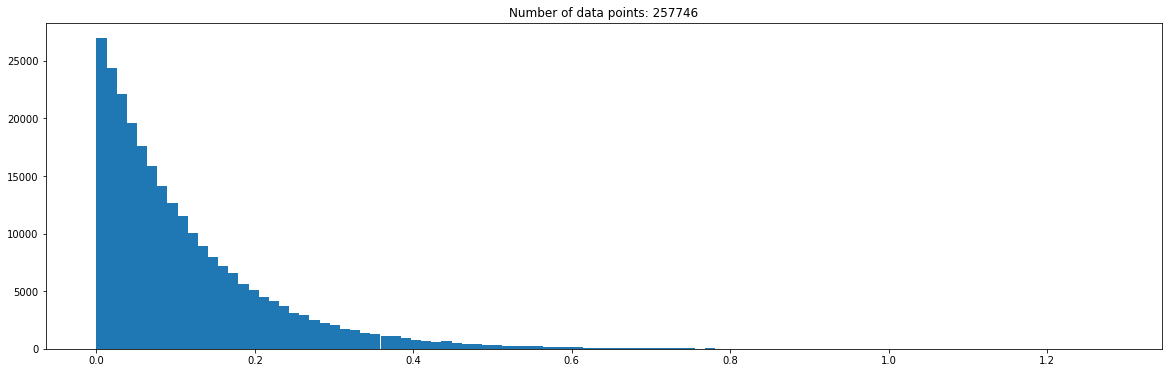

mean: 0.1122631808496016
median: 0.07890720442903185
std: 0.11034222767749928


In [35]:
plt.figure(figsize=(20, 6))
plt.hist(np.abs(angle_displacements), bins=100)
plt.title('Number of data points: ' + str(len(angle_displacements)))
plt.show()

print('mean: ' + str(np.mean(np.abs(angle_displacements))))
print('median: ' + str(np.median(np.abs(angle_displacements))))
print('std: ' + str(np.std(np.abs(angle_displacements))))

In [13]:
1/(n * (r(n, D) ** 2) * math.pi) * math.pi

0.10000000000000002

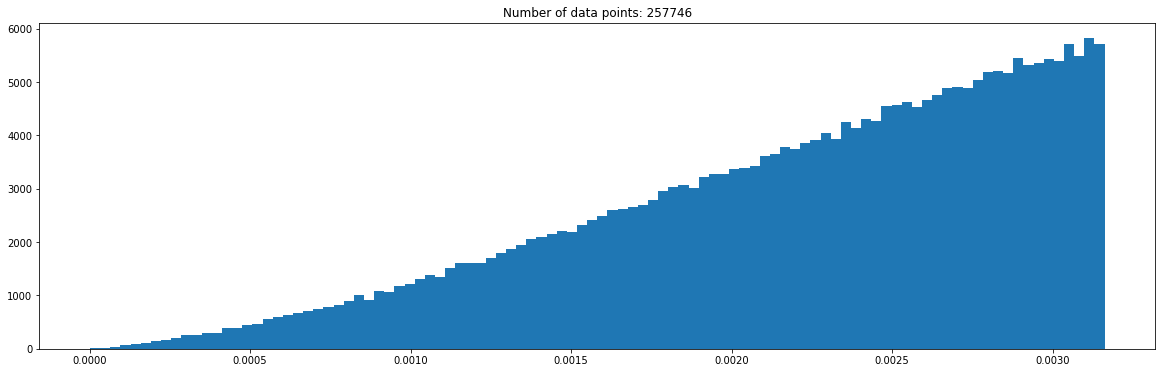

mean: 0.0022180654317228983
median: 0.002346007257268183
std: 0.0006833360651478497


In [40]:
plt.figure(figsize=(20, 6))
plt.hist(np.abs(edge_lengths), bins=100)
plt.title('Number of data points: ' + str(len(edge_lengths)))
plt.show()

print('mean: ' + str(np.mean(np.abs(edge_lengths))))
print('median: ' + str(np.median(np.abs(edge_lengths))))
print('std: ' + str(np.std(np.abs(edge_lengths))))

In [39]:
( r(n,D) ** 2) * math.pi * n

31.41592653589792

In [43]:
r(n, D) * (2/3)

0.0021081851067789193

In [48]:
temp = defaultdict(list)

# temp[i] = [#above, #below]

for i in range(1,1001):
    temp[i].append(0)
    temp[i].append(0)
    for p in points[i-1]:
        if p[0] > p[1]:
            temp[i][1] += 1
        elif p[0] < p[1]:
            temp[i][0] += 1
        else:
            pass

In [51]:
def show_counts_1(path_idx):
    print('# above shortest path: ' + str(temp[path_idx][0]))
    print('# below shortest path: ' + str(temp[path_idx][1]))

In [52]:
interact(show_counts_1, path_idx=widgets.IntSlider(min=1, max=1000, step=1, value=1))

interactive(children=(IntSlider(value=1, description='path_idx', max=1000, min=1), Output()), _dom_classes=('w…

<function __main__.show_counts_1(path_idx)>

In [ ]:
temp_2 = defaultdict(list)

for i in range(1,1001):
    for p in points[i-1][1:-1]:
        

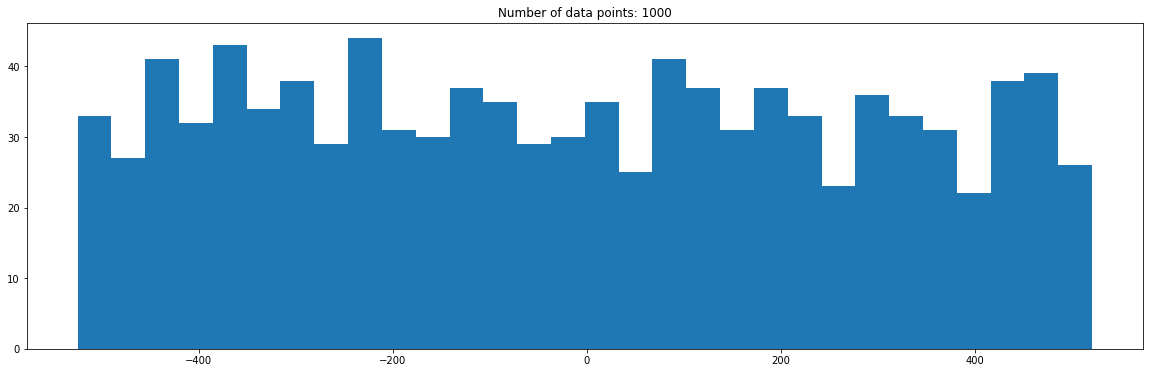

mean: -13.373
median: -18.0
std: 300.8685159184989


In [56]:
# the above shows that the path followed by the traversal is in fact not in any way mean-reverting
# below we can plot this histogram for (# above - #below)

above_below_diff = []
for k in temp.keys():
    above_below_diff.append(temp[k][0] - temp[k][1])

plt.figure(figsize=(20, 6))
plt.hist(above_below_diff, bins=30)
plt.title('Number of data points: ' + str(len(above_below_diff)))
plt.show()

print('mean: ' + str(np.mean(above_below_diff)))
print('median: ' + str(np.median(above_below_diff)))
print('std: ' + str(np.std(above_below_diff)))

515.421


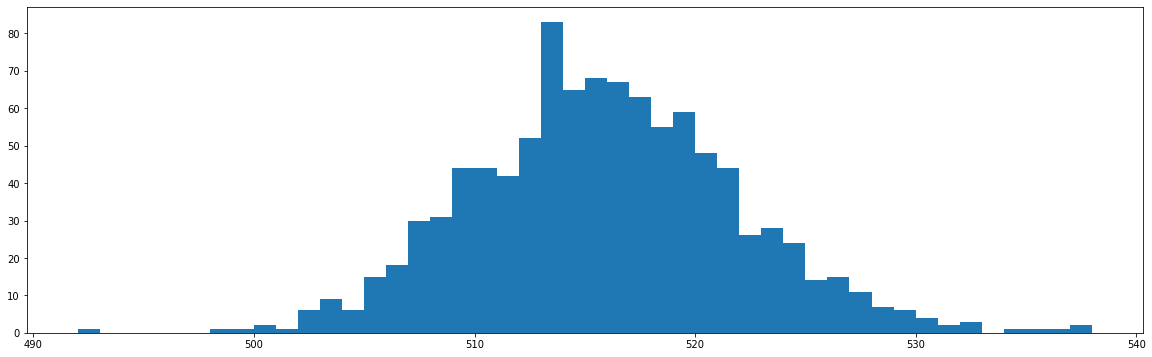

In [7]:
plt.figure(figsize=(20, 6))
plt.hist(counts, range(min(counts), 1+max(counts)))
#plt.xticks(range(min(T_array), 1+max(T_array)))
#plt.title(str(num) + ' bins')
print(np.mean(counts))

In [11]:
def show_traversal(idx):
    results = points[idx]
    
    x_ip = [0.1, 0.9]
    y_ip = [0.1, 0.9]

    # plot points here
    plt.figure(figsize=(20, 20))
    plt.margins(0.001)
    #plt.xlim(-0.05, ell + 0.05)
    #plt.ylim(-0.5 * ell / 10, 0.5 * ell / 10)
    
    xs, ys = np.array(results).T

    plt.scatter(xs, ys, s=2, c='red')
    plt.scatter(x_ip, y_ip, s=20, c='gold')
    
    path_edges = []
    for j in range(len(results)-1):
        path_edges.append(np.array([[results[j][0], results[j][1]], [results[j+1][0], results[j+1][1]]]))
    path_edges = np.array(path_edges)
    for edge in path_edges:
        xs, ys = edge.T
        plt.plot(xs, ys, 'b-', linewidth=0.5, alpha=0.5)
    
    plt.title('simulation ' + str(idx))
    plt.show()

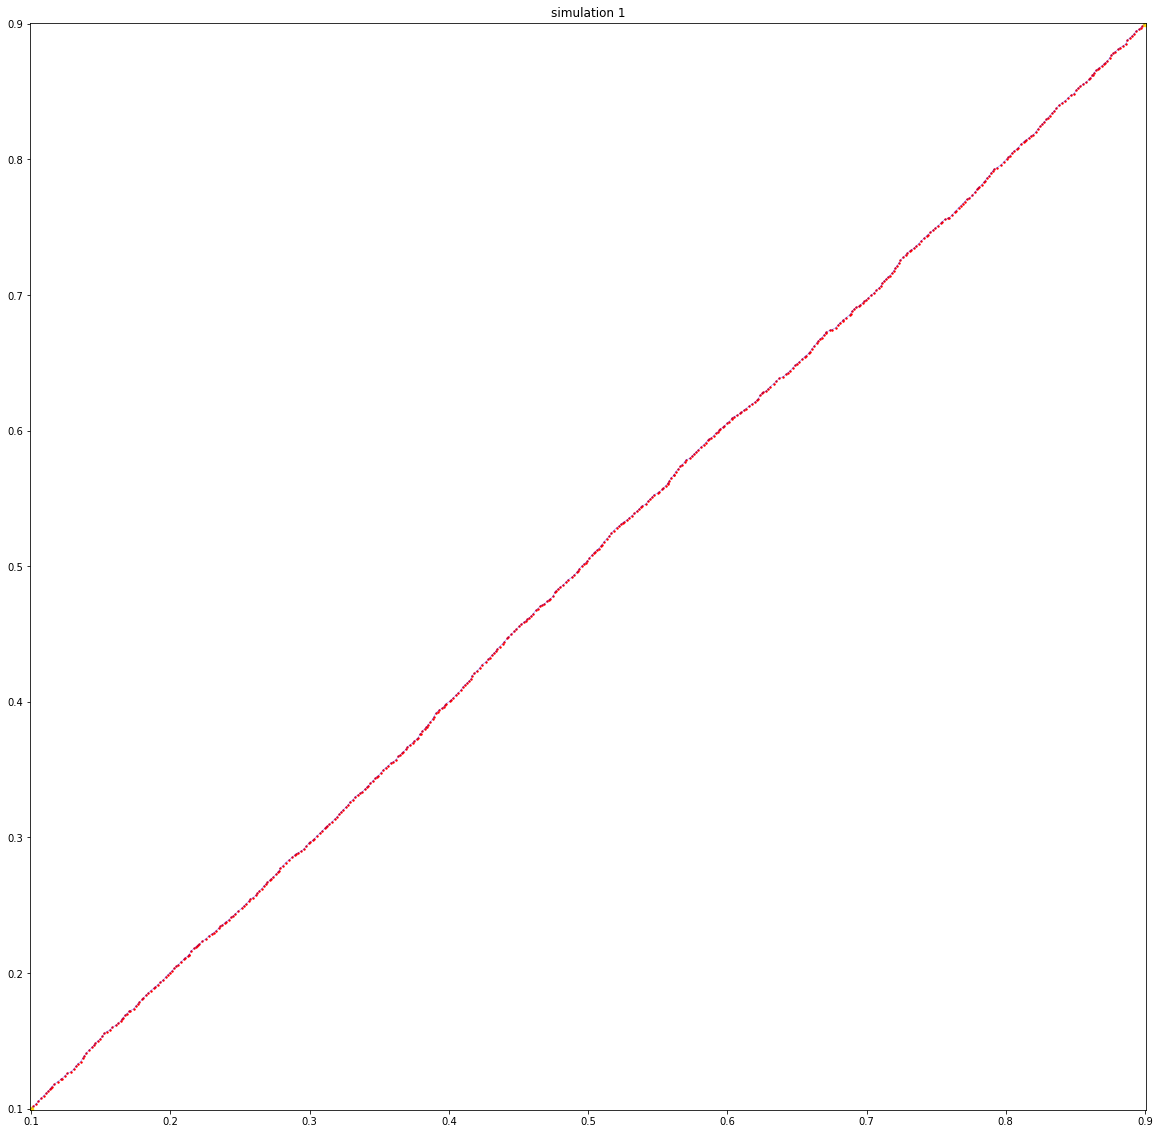

In [12]:
show_traversal(1)

In [13]:
lengths = deepcopy(S_n)

In [15]:
describe(lengths)

DescribeResult(nobs=1000, minmax=(1.1386894714459912, 1.1494309343480296), mean=1.1433867143714047, variance=2.6997702476019394e-06, skewness=0.26824564636951004, kurtosis=0.018551549386232047)